In [1]:
# 합성곱 신경망 사용을 위한 데이터 준비
import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1,28,28,1) / 255.0 # (batch size, height, width, channels) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

2025-08-26 11:25:30.086546: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-26 11:25:30.113434: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-26 11:25:30.113457: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-26 11:25:30.113476: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-26 11:25:30.118408: I tensorflow/core/platform/cpu_feature_g

In [2]:
# 합성곱 신경망 만들기
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28,28,1)))
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same')) # 32개 필터 사용

2025-08-26 11:25:32.040172: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-08-26 11:25:32.061211: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-08-26 11:25:32.061395: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [3]:
# 풀링 층을 추가
model.add(keras.layers.MaxPooling2D(2)) # (2,2) 풀링 크기 사용, kernel_size처럼 가로세로 크기가 같으면 정수하나로 지정 가능 

In [4]:
# 두 번째  합성곱-풀링층 추가
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [5]:
# 출력층에서 확률을 계산하기위해 3차원 특성맵을 일렬로 펼치기 및 은닉층 추가
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu')) # 은닉층
model.add(keras.layers.Dropout(0.4)) # 드롭아웃 층이 은닉층의 과대적합을 막음
model.add(keras.layers.Dense(10, activation='softmax')) # 출력층

In [6]:
# 모델의 구조 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [7]:
# 모델 파라미터 개수 
# 첫 번째 합성곱 층 -> 3*3*1*32+32 = 320개
# 두 번째 합성곱 층 -> 3*3*32*64+64 = 18496개
# 은닉층 -> 3136*100+100 = 313700개 
# 출력층 -> 100*10+10 = 1010개 

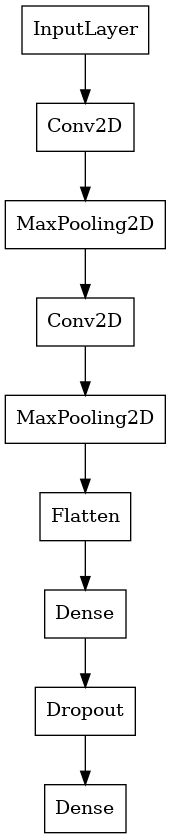

In [12]:
# 층의 구성을 그림으로 표현해주는 plot_model() 함수호출
keras.utils.plot_model(model, show_layer_names=False)

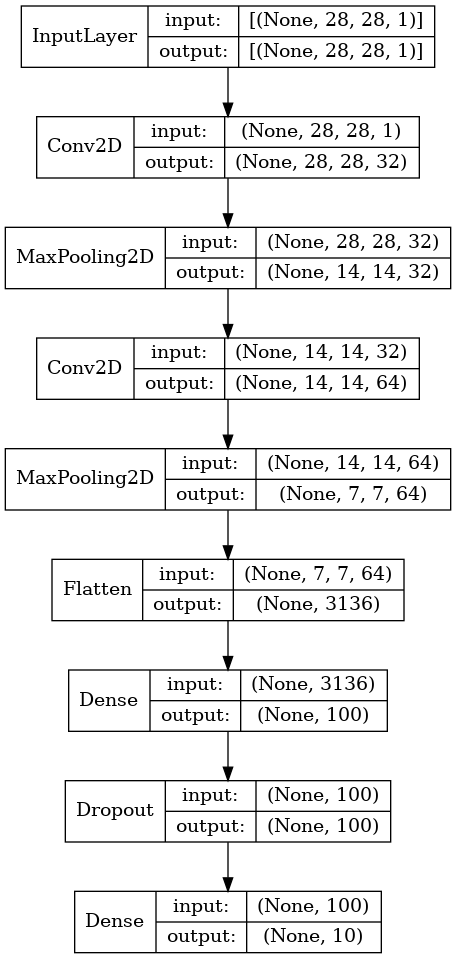

In [11]:
keras.utils.plot_model(model, show_shapes=True, show_layer_names=False)

In [ ]:
# 모델 컴파일 및 훈련
# keras API는 딥러닝 모델의 종류나 구성 방식에 상관없이 컴파일과 훈련과정이 같다.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.tf', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True) # 최적의 모델파라미터 저장
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20


2025-08-26 11:35:16.718104: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8904
2025-08-26 11:35:17.473660: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x714cac5bef70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-08-26 11:35:17.473677: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3080 Ti Laptop GPU, Compute Capability 8.6
2025-08-26 11:35:17.478273: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-08-26 11:35:17.554572: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1492/1500 [============================>.] - ETA: 0s - loss: 0.5262 - accuracy: 0.8116INFO:tensorflow:Assets written to: best-cnn-model.tf/assets


INFO:tensorflow:Assets written to: best-cnn-model.tf/assets


1500/1500 [==============================] - 10s 5ms/step - loss: 0.5255 - accuracy: 0.8119 - val_loss: 0.3308 - val_accuracy: 0.8770
Epoch 2/20
1489/1500 [============================>.] - ETA: 0s - loss: 0.3500 - accuracy: 0.8734INFO:tensorflow:Assets written to: best-cnn-model.tf/assets


INFO:tensorflow:Assets written to: best-cnn-model.tf/assets


1500/1500 [==============================] - 7s 5ms/step - loss: 0.3501 - accuracy: 0.8733 - val_loss: 0.2829 - val_accuracy: 0.8942
Epoch 3/20
1495/1500 [============================>.] - ETA: 0s - loss: 0.3054 - accuracy: 0.8889INFO:tensorflow:Assets written to: best-cnn-model.tf/assets


INFO:tensorflow:Assets written to: best-cnn-model.tf/assets


1500/1500 [==============================] - 6s 4ms/step - loss: 0.3056 - accuracy: 0.8889 - val_loss: 0.2604 - val_accuracy: 0.9038
Epoch 4/20
1497/1500 [============================>.] - ETA: 0s - loss: 0.2700 - accuracy: 0.9003INFO:tensorflow:Assets written to: best-cnn-model.tf/assets


INFO:tensorflow:Assets written to: best-cnn-model.tf/assets


1500/1500 [==============================] - 9s 6ms/step - loss: 0.2702 - accuracy: 0.9002 - val_loss: 0.2558 - val_accuracy: 0.9040
Epoch 5/20
1485/1500 [============================>.] - ETA: 0s - loss: 0.2476 - accuracy: 0.9094INFO:tensorflow:Assets written to: best-cnn-model.tf/assets


INFO:tensorflow:Assets written to: best-cnn-model.tf/assets


1500/1500 [==============================] - 8s 5ms/step - loss: 0.2480 - accuracy: 0.9094 - val_loss: 0.2445 - val_accuracy: 0.9087
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2293 - accuracy: 0.9167 - val_loss: 0.2473 - val_accuracy: 0.9078
Epoch 7/20
1495/1500 [============================>.] - ETA: 0s - loss: 0.2130 - accuracy: 0.9217INFO:tensorflow:Assets written to: best-cnn-model.tf/assets


INFO:tensorflow:Assets written to: best-cnn-model.tf/assets


1500/1500 [==============================] - 8s 5ms/step - loss: 0.2129 - accuracy: 0.9217 - val_loss: 0.2208 - val_accuracy: 0.9179
Epoch 8/20
1495/1500 [============================>.] - ETA: 0s - loss: 0.1965 - accuracy: 0.9274INFO:tensorflow:Assets written to: best-cnn-model.tf/assets


INFO:tensorflow:Assets written to: best-cnn-model.tf/assets


1500/1500 [==============================] - 9s 6ms/step - loss: 0.1964 - accuracy: 0.9274 - val_loss: 0.2200 - val_accuracy: 0.9178
Epoch 9/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1818 - accuracy: 0.9312 - val_loss: 0.2261 - val_accuracy: 0.9183
Epoch 10/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1690 - accuracy: 0.9351 - val_loss: 0.2277 - val_accuracy: 0.9188


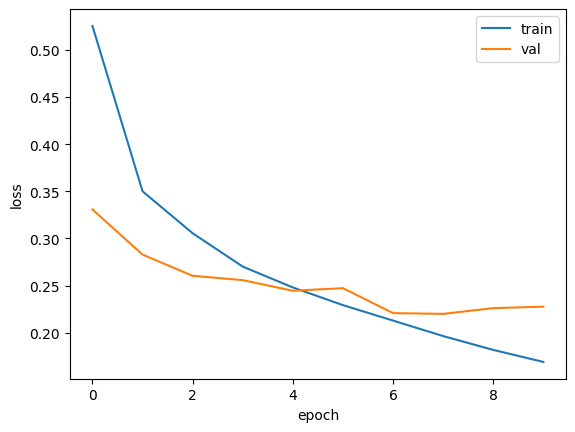

In [14]:
# 조기 종료 확인
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
# 성능평가
model.evaluate(val_scaled, val_target)
# 8번째 에포크의 출력과 동일 -> 최적의 모델 파라미터 저장 됨

375/375 [==============================] - 1s 1ms/step - loss: 0.2200 - accuracy: 0.9178


[0.21997681260108948, 0.9178333282470703]

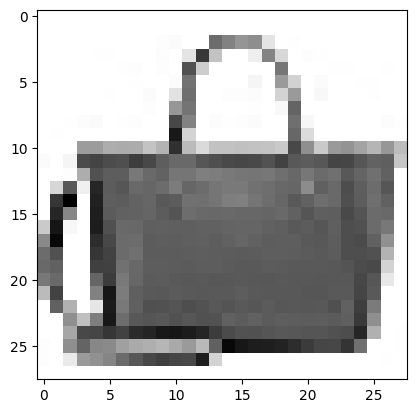

In [17]:
# predict() 메서드를 사용해 새로운 데이터에 대한 예측

# 첫 번째 샘플이미지 확인
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [ ]:
# 핸드백 이미지, 10개의 클래스에 대한 예측 확인
preds = model.predict(val_scaled[0:1]) # 첫 번째 차원이 배치차원일 것으로 기대하므로, 하나의 이미지일지라도 배열 슬라이싱을 통해 전달해야함
print(preds)
# 모델은 8번 요소를 확신

1/1 [==============================] - 0s 93ms/step
[[3.9200726e-18 1.8713676e-25 2.0218852e-20 2.0716767e-17 3.4530293e-19
  2.3540968e-19 6.1991004e-18 6.1511776e-21 1.0000000e+00 5.4733740e-20]]


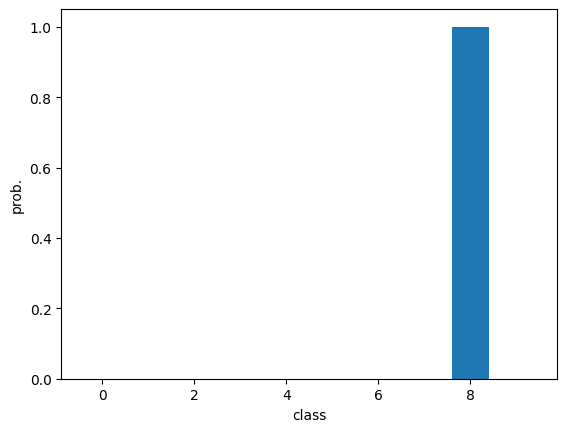

In [20]:
# 막대 그래프로 확인
plt.bar(range(0,10), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [21]:
# 실제로 8번 요소가 무엇인지 확인
# 패션 MNIST 데이터셋의 레이블 저장
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

import numpy as np

print(classes[np.argmax(preds)]) # preds 배열에서 가장 큰 인덱스를 찾아 classes 인덱스로 사용

가방


In [ ]:
# 맨 처음 분리한 테스트 세트로 합성곱 신경망의 일반화 성능 가늠
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0 # 픽셀 값의 범위를 0~1 사이로 바꾸고 채널 차원 추가

# 성능 측정
model.evaluate(test_scaled, test_target)
# 모델을 실전에 투입하여 패션 아이템을 분리한다면 91%성능 기대 가능 

313/313 [==============================] - 1s 2ms/step - loss: 0.2447 - accuracy: 0.9131


[0.24466760456562042, 0.913100004196167]